# IMPORT LIBRARIES

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DATASET AND INFO

In [142]:
dataset = pd.read_csv('../data/Salary_Data.csv')

In [143]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [145]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# DEPENDENT AND INDEPENDENT VARIABLE

In [146]:
x = dataset.iloc[:,0:-1].values

In [147]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [148]:
y = dataset.iloc[:,-1].values

In [149]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


# SPLIT THE DATASET BETWEEN TRAIN AND TEST

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [151]:
print(x_train)
print(x_test)

[[ 4. ]
 [ 7.1]
 [ 4. ]
 [ 8.2]
 [ 5.9]
 [ 2.2]
 [ 2. ]
 [ 8.7]
 [ 5.1]
 [ 4.5]
 [ 6.8]
 [ 3.7]
 [ 4.9]
 [ 9. ]
 [ 1.1]
 [ 1.3]
 [ 7.9]
 [ 3.9]
 [ 6. ]
 [ 5.3]
 [ 3. ]
 [10.3]
 [ 1.5]
 [ 4.1]]
[[ 3.2]
 [10.5]
 [ 2.9]
 [ 9.5]
 [ 3.2]
 [ 9.6]]


In [152]:
print(y_train)
print(y_test)

[ 56957.  98273.  55794. 113812.  81363.  39891.  43525. 109431.  66029.
  61111.  91738.  57189.  67938. 105582.  39343.  46205. 101302.  63218.
  93940.  83088.  60150. 122391.  37731.  57081.]
[ 54445. 121872.  56642. 116969.  64445. 112635.]


# LINEAR REGRESSION

In [153]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [154]:
regressor.score(x_train,y_train)

0.9477046223654454

In [155]:
regressor.coef_

array([9764.6175583])

In [156]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [157]:
regressor.intercept_

24018.566009392227

# PREDICTION

In [158]:
y_pred = regressor.predict(x_test)
y_pred

array([ 55265.34219594, 126547.05037149,  52335.95692845, 116782.4328132 ,
        55265.34219594, 117758.89456903])

In [159]:
y_test

array([ 54445., 121872.,  56642., 116969.,  64445., 112635.])

# VISUALIZATION

Text(0.5, 0, 'Years Of Experience')

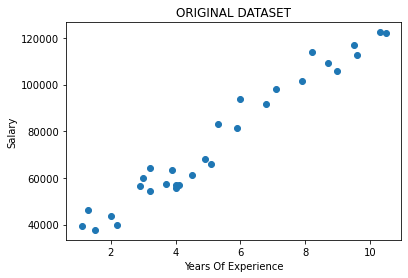

In [160]:
plt.scatter(x,y)
plt.title('ORIGINAL DATASET')
plt.ylabel('Salary')
plt.xlabel('Years Of Experience')

Text(0.5, 0, 'Years Of Experience')

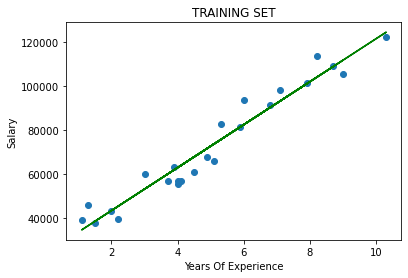

In [161]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='green')
plt.title('TRAINING SET')
plt.ylabel('Salary')
plt.xlabel('Years Of Experience')

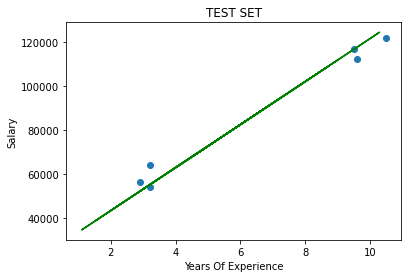

In [165]:
plt.scatter(x_test,y_test)
plt.title('TEST SET')
plt.plot(x_train,regressor.predict(x_train),color='green')
plt.ylabel('Salary')
plt.xlabel('Years Of Experience')
plt.show()